In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from sklearn.svm import SVC
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Question 1

In [8]:
data = pd.read_csv('wine_original.csv')
labels = data['class']
del data['class']

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=3)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

parameters = { 'penalty': ['l1','l2'], 
              'C':[0.1, 0.5, 1, 2, 3, 4, 5, 10]}
logreg = LogisticRegression()
clf = GridSearchCV(logreg, parameters, verbose=True, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
train_acc = accuracy_score(clf.predict(X_train), y_train)
print ('Selected Parameters: ', clf.best_params_)
print ('Training Accuracy = ' + str(train_acc))
print ('Test Accuracy = ' + str(accuracy))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Selected Parameters:  {'C': 1, 'penalty': 'l1'}
Training Accuracy = 0.992957746479
Test Accuracy = 0.888888888889


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.3s finished


In [130]:
# Data Processing SVM
categories = ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.politics.mideast']
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), categories=categories)

In [131]:
stop = set(stopwords.words('english'))

In [15]:
# Stopwords, lowercase
vectorizer = TfidfVectorizer(stop_words=stop, lowercase=True, max_features=2000)
train_vectors = vectorizer.fit_transform(newsgroups_train.data)
test_vectors = vectorizer.transform(newsgroups_test.data)

# Perceptron

In [133]:
#Question 2

# Model
clf = Perceptron(penalty=None)
# fit
clf.fit(train_vectors, newsgroups_train.target)
# predict
pred = clf.predict(test_vectors)
#evaluate
print ('Test accuracy = ' + str(accuracy_score(newsgroups_test.target, pred)))

Test accuracy = 0.803112313938


In [135]:
#Question 3

result = []
for data_size in [100, 200, 500, 1000, 1500, 2000, 4000, 10000, 20000, 30000]:
    vectorizer = TfidfVectorizer(stop_words=stop, lowercase=True, max_features=data_size)
    train_vectors = vectorizer.fit_transform(newsgroups_train.data)
    test_vectors = vectorizer.transform(newsgroups_test.data)
    clf = Perceptron(penalty=None)
    clf.fit(train_vectors, newsgroups_train.target)
    pred = clf.predict(test_vectors)
    print ('Test accuracy = ' + str(accuracy_score(newsgroups_test.target, pred)))
    result.append(1-accuracy_score(newsgroups_test.target, pred))

Test accuracy = 0.606901217862
Test accuracy = 0.673207036536
Test accuracy = 0.730040595399
Test accuracy = 0.742219215156
Test accuracy = 0.752368064953
Test accuracy = 0.768606224628
Test accuracy = 0.790933694181
Test accuracy = 0.812584573748
Test accuracy = 0.816644113667
Test accuracy = 0.803112313938


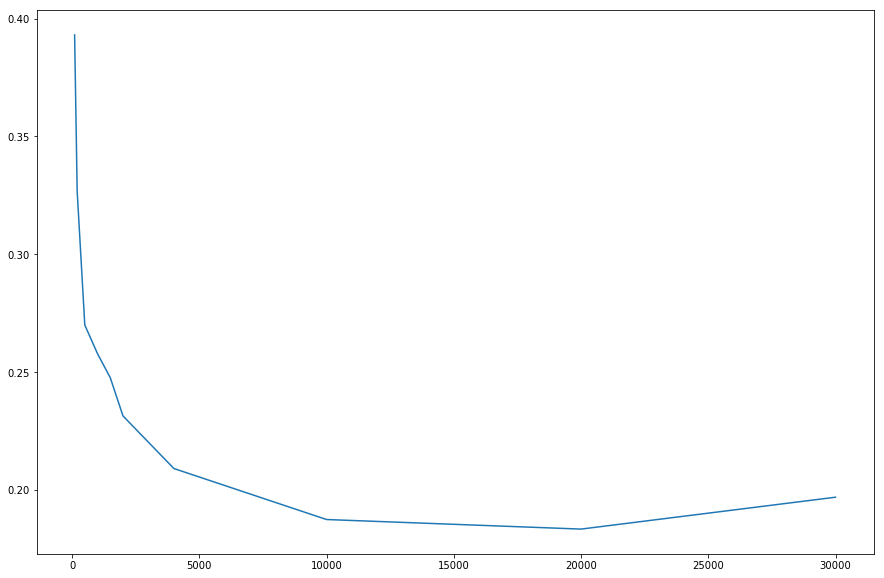

In [136]:
plt.figure(figsize=(15,10))
plt.plot([100, 200, 500, 1000, 1500, 2000, 4000, 10000, 20000, 30000], result)

# SVM

In [141]:
#Question 4

clf = SVC(kernel='linear')
clf.fit(train_vectors, newsgroups_train.target)
pred = clf.predict(test_vectors)
print ('Test accuracy : ' + str(accuracy_score(newsgroups_test.target, pred)))

Test accuracy : 0.832882273342


In [145]:
# Question 5

result = []
for data_size in [100, 200, 500, 1000, 1500, 2000, 4000, 10000, 20000, 30000]:
    vectorizer = TfidfVectorizer(stop_words=stop, lowercase=True, max_features=data_size)
    train_vectors = vectorizer.fit_transform(newsgroups_train.data)
    test_vectors = vectorizer.transform(newsgroups_test.data)
    clf = SVC(kernel='linear')
    clf.fit(train_vectors, newsgroups_train.target)
    pred = clf.predict(test_vectors)
    print ('Test accuracy = ' + str(accuracy_score(newsgroups_test.target, pred)))
    result.append(1-accuracy_score(newsgroups_test.target, pred))

Test accuracy = 0.652232746955
Test accuracy = 0.692151556157
Test accuracy = 0.742219215156
Test accuracy = 0.767253044655
Test accuracy = 0.776725304465
Test accuracy = 0.78552097429
Test accuracy = 0.821380243572
Test accuracy = 0.832882273342
Test accuracy = 0.831529093369
Test accuracy = 0.832882273342


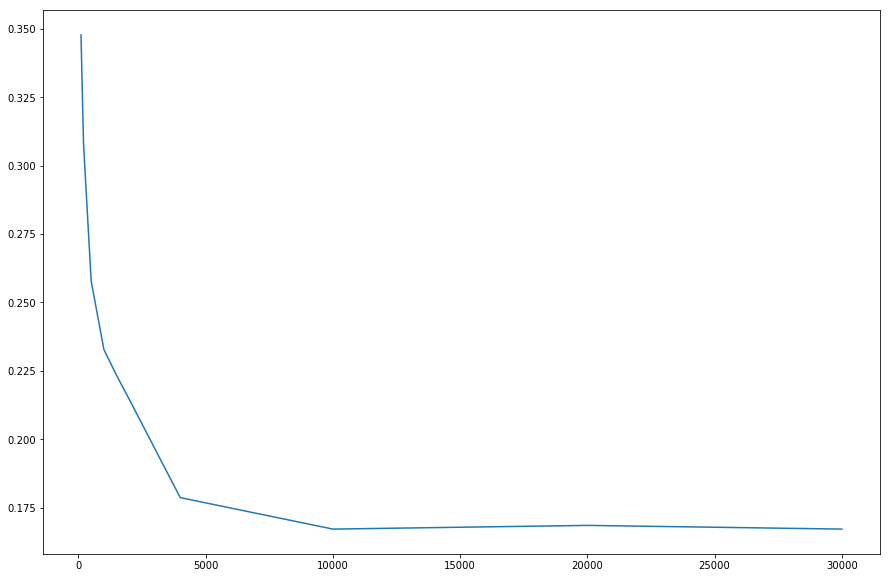

In [146]:
plt.figure(figsize=(15,10))
plt.plot([100, 200, 500, 1000, 1500, 2000, 4000, 10000, 20000, 30000], result)

In [148]:
X_train, X_valid, y_train, y_valid = train_test_split(train_vectors, newsgroups_train.target, test_size=0.2, random_state=10)

In [149]:
# Question 6

for cost in [0.01,0.1,1,10,100]:
    clf = SVC(kernel='linear', C=cost)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_valid)
    print ('Valid accuracy for C= '+ str(cost) + ' : ' + str(accuracy_score(y_valid, pred)))

Valid accuracy for C= 0.01 : 0.244943820225
Valid accuracy for C= 0.1 : 0.624719101124
Valid accuracy for C= 1 : 0.880898876404
Valid accuracy for C= 10 : 0.87191011236
Valid accuracy for C= 100 : 0.833707865169


In [150]:
clf = SVC(kernel='linear', C=1)
clf.fit(train_vectors, newsgroups_train.target)
pred = clf.predict(test_vectors)
print ('Test accuracy for C = '+ str(1) + ' : ' + str(accuracy_score(newsgroups_test.target, pred)))

Test accuracy for C = 1 : 0.832882273342


In [164]:
#Question 7

for kernel in ['linear', 'rbf', 'sigmoid']:
    clf = SVC(kernel=kernel, C=10000)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_valid)
    print ('Validation accuracy for kernel = '+ kernel + ' : ' + str(accuracy_score(y_valid, pred)))

Validation accuracy for kernel = linear : 0.833707865169
Validation accuracy for kernel = rbf : 0.862921348315
Validation accuracy for kernel = sigmoid : 0.83595505618


In [170]:
for deg in range(1,6):
    clf = SVC(kernel='poly', degree=deg , C=10000)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_valid)
    print ('Validation accuracy for kernel = poly '+ str(deg) + ' : ' + str(accuracy_score(y_valid, pred)))

Validation accuracy for kernel = poly 1 : 0.83595505618
Validation accuracy for kernel = poly 2 : 0.244943820225
Validation accuracy for kernel = poly 3 : 0.244943820225
Validation accuracy for kernel = poly 4 : 0.244943820225
Validation accuracy for kernel = poly 5 : 0.244943820225


In [169]:
#Selecting rbf kernel

clf = SVC(kernel='rbf', degree=deg , C=10000)
clf.fit(train_vectors, newsgroups_train.target)
pred = clf.predict(test_vectors)
print ('Test accuracy for kernel = rbf' + str(accuracy_score(newsgroups_test.target, pred)))

Test accuracy for kernel = rbf0.832882273342


In [171]:
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel, cosine_similarity, laplacian_kernel

In [173]:
# Question 8

def my_kernel_cosine(X,Y):
    return cosine_similarity(X, Y)

clf = SVC(kernel=my_kernel_cosine)
clf.fit(train_vectors, newsgroups_train.target)
pred = clf.predict(test_vectors)
print ('Test accuracy = ' +  str(accuracy_score(newsgroups_test.target, pred)))

Test accuracy = 0.832882273342


In [226]:
def my_kernel_laplacian(X,Y):
    return laplacian_kernel(X, Y)

clf = SVC(kernel=my_kernel_laplacian)
clf.fit(train_vectors, newsgroups_train.target)
pred = clf.predict(test_vectors)
print ('Test accuracy = ' +  str(accuracy_score(newsgroups_test.target, pred)))

Test accuracy = 0.266576454668


In [ ]:
# def my_kernel(alpha):
#     return lambda X, Y: alpha*polynomial_kernel(X, Y, degree=1) + (1-alpha)*rbf_kernel(X, Y, gamma=1)

In [224]:
# Question 9

def my_gram(X, Y, alpha):
#     alpha=0.5
    return alpha*cosine_similarity(X, Y) + (1-alpha)*laplacian_kernel(X, Y)

In [225]:
for alpha in np.arange(0,1.1,0.1):
    k_train = my_gram(X_train, X_train, alpha)
    k_valid = my_gram(X_valid, X_train, alpha)
    clf = SVC(kernel='precomputed')
    clf.fit(k_train, y_train)
    pred = clf.predict(k_valid)
    print ('Validation accuracy for alpha = '+ str(alpha) + ' : ' + str(accuracy_score(y_valid, pred)))

Validation accuracy for alpha = 0.0 : 0.244943820225
Validation accuracy for alpha = 0.1 : 0.626966292135
Validation accuracy for alpha = 0.2 : 0.791011235955
Validation accuracy for alpha = 0.3 : 0.829213483146
Validation accuracy for alpha = 0.4 : 0.851685393258
Validation accuracy for alpha = 0.5 : 0.860674157303
Validation accuracy for alpha = 0.6 : 0.862921348315
Validation accuracy for alpha = 0.7 : 0.865168539326
Validation accuracy for alpha = 0.8 : 0.869662921348
Validation accuracy for alpha = 0.9 : 0.87191011236
Validation accuracy for alpha = 1.0 : 0.880898876404


In [204]:
alpha = 0.2
k_train = my_gram(train_vectors, train_vectors, alpha)
k_test = my_gram(test_vectors, train_vectors, alpha)
clf = SVC(kernel='precomputed', C=10)
clf.fit(k_train, newsgroups_train.target)
pred = clf.predict(k_test)
print ('Test accuracy for alpha = '+ str(alpha) + ' : ' + str(accuracy_score(newsgroups_test.target, pred)))

Test accuracy for alpha = 0.2 : 0.266576454668
